# Revtsov HW8

In [39]:
library(forecast)

In [2]:
options(repr.plot.res = 180)

## Problem 1

### Part a

$$
    \phi(z) = 1 - 0.7z + 0.5z^2
$$

In [3]:
(roots = polyroot(c(1, -0.7, 0.5)))

Mod(roots)

[1] 0.7+1.228821i 0.7-1.228821i

[1] 1.414214 1.414214

The magnitude of all the polynomial roots is > 1, therefore we have a causal stationary process

### Part b

$$
    X_t = \phi_1 X_{t-1} - \phi_2 X_{t-2} + \theta_1 Z_{t-1}
$$
Take cov w/ Z_t 
$$
    \mathbb{C}[X_t, Z_t] - \phi_1 \mathbb{C}[X_{t-1}, Z_t] - \phi_2 \mathbb{C}[X_{t-2}, Z_t] = \mathbb{C}[Z_t, Z_t] + \theta_1 \mathbb{C}[Z_t, Z_{t-1}]
$$
$$
    \mathbb{C}[X_t, Z_t] = \sigma^2 = 1
$$
Take cov w/ Z_{t-1}
$$
    \mathbb{C}[X_t, Z_{t-1}] - \phi_1 \mathbb{C}[X_{t-1}, Z_{t-1}] - \phi_2 \mathbb{C}[X_{t-2}, Z_{t-1}] = \mathbb{C}[Z_t, Z_{t-1}] + \theta_1 \mathbb{C}[Z_{t-1}, Z_{t-1}]
$$
$$
    \mathbb{C}[X_t, Z_{t-1}] - \phi_1 \sigma^2 = \theta_1 \sigma^2
$$
$$
    \mathbb{C}[X_t, Z_{t-1}] = \phi_1 \sigma^2 + \theta_1 \sigma^2 = 0.7*1 + 0.2 * 1 = 0.9
$$
Take cov w/ X_{t-h}
$$
    \mathbb{C}[X_t, X_{t-h}] - \phi_1 \mathbb{C}[X_{t-1}, X_{t-h}] - \phi_2 \mathbb{C}[X_{t-2}, X_{t-h}] = \mathbb{C}[Z_t, X_{t-h}] + \theta_1 \mathbb{C}[Z_{t-1}, X_{t-h}]
$$
$$
    \gamma(h) - \phi_1 \gamma(h-1) - \phi_2 \gamma(h-2) = \mathbb{C}[Z_t, X_{t-h}] + \theta_1 \mathbb{C}[Z_{t-1}, X_{t-h}]
$$
For h=0
$$
    \gamma(h) - \phi_1 \gamma(h-1) - \phi_2 \gamma(h-2) = \mathbb{C}[Z_t, X_{t}] + \theta_1 \mathbb{C}[Z_{t-1}, X_{t}]
$$
$$
    \gamma(h) - \phi_1 \gamma(h-1) - \phi_2 \gamma(h-2) = 1 + 0.2*0.9 = 1.18
$$
For h=1
$$
    \gamma(h) - \phi_1 \gamma(h-1) - \phi_2 \gamma(h-2) = \mathbb{C}[Z_t, X_{t-1}] + \theta_1 \mathbb{C}[Z_{t-1}, X_{t-1}]
$$
$$
    \gamma(h) - \phi_1 \gamma(h-1) - \phi_2 \gamma(h-2) = \theta_1 \mathbb{C}[Z_{t-1}, X_{t-1}] = 0.2*1 = 0.2
$$
For h>=2, because X_t doesn't depend on future Z_t
$$
    \gamma(h) - \phi_1 \gamma(h-1) - \phi_2 \gamma(h-2) = \mathbb{C}[Z_t, X_{t-1}] + \theta_1 \mathbb{C}[Z_{t-1}, X_{t-2}]
$$
$$
    \gamma(h) - \phi_1 \gamma(h-1) - \phi_2 \gamma(h-2) = 0
$$


### Part c

In [4]:
eq.a = matrix(0, nrow=11, ncol=11)
eq.b = numeric(11)

In [5]:
eq.b[1] = 1.18
eq.b[2] = 0.2

In [6]:
eq.a[1, 1] = 1
eq.a[1, 2] = -0.7
eq.a[1, 3] = 0.5
eq.a[2, 1] = -0.7
eq.a[2, 2] = 1.5

In [7]:
for (i in 3:11) {
    eq.a[i, i] = 1
    eq.a[i, i-1] = -0.7
    eq.a[i, i-2] = 0.5
}

In [8]:
gamma = solve(a=eq.a, b=eq.b)

In [9]:
model.acf = ARMAacf(ar=c(0.7, -0.5), ma=c(0.2), lag.max=10)

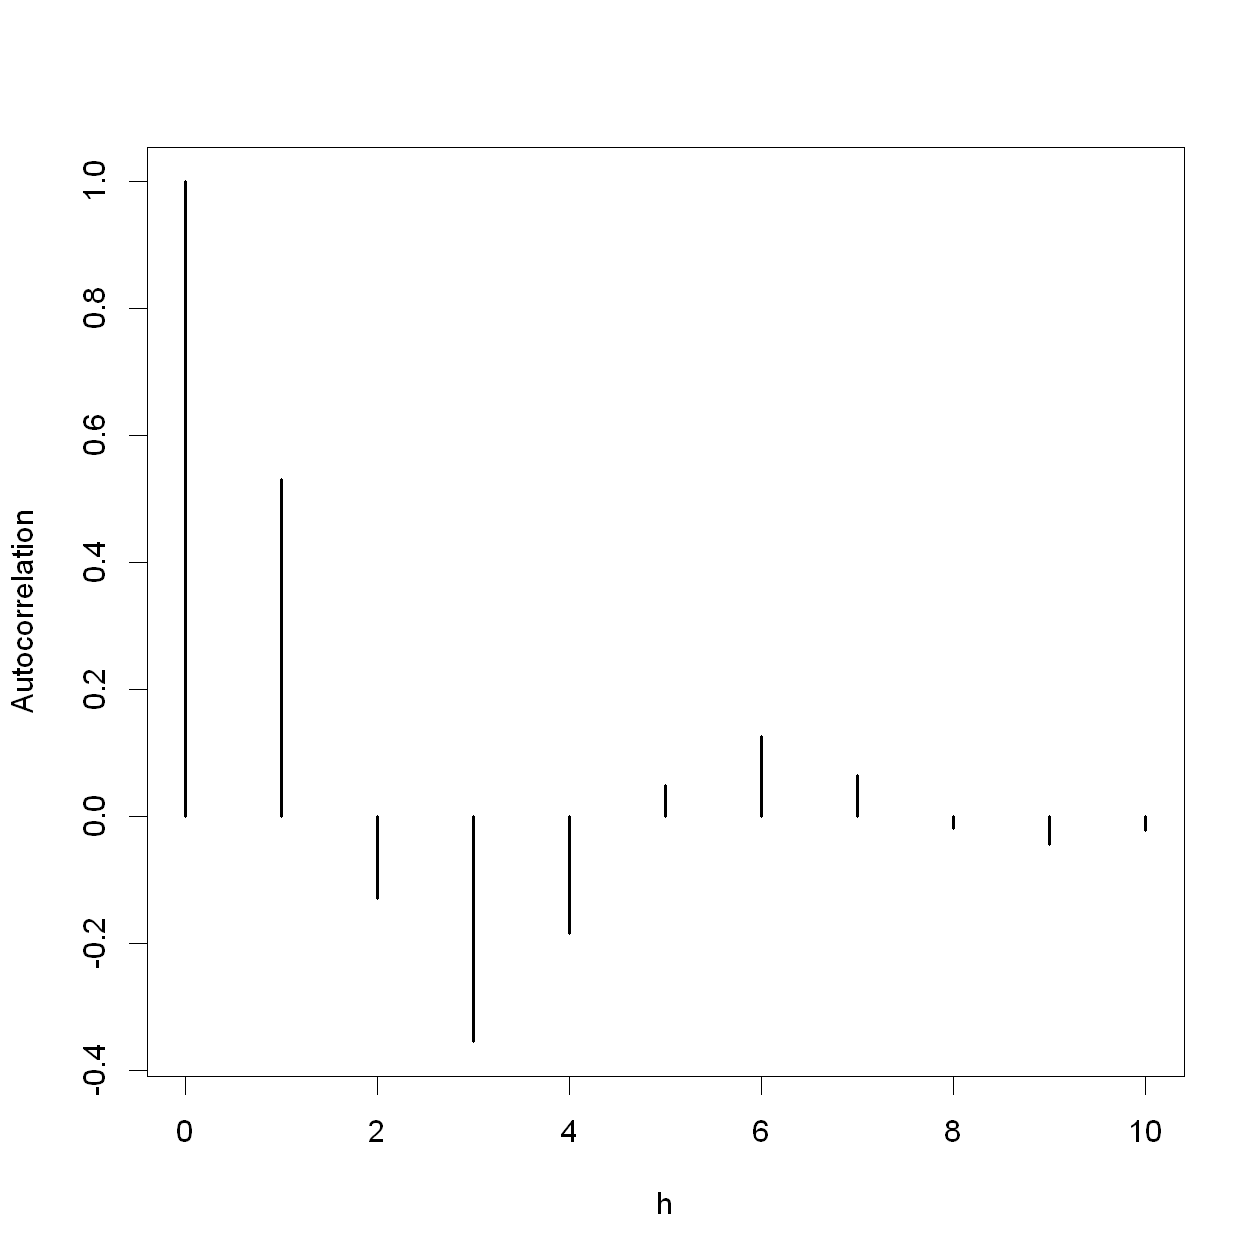

In [10]:
# to get autocorrelation divide autocovariance by gamma(0)
plot(0:10, gamma / gamma[1], xlab="h", ylab="Autocorrelation", type="h", lwd=2)

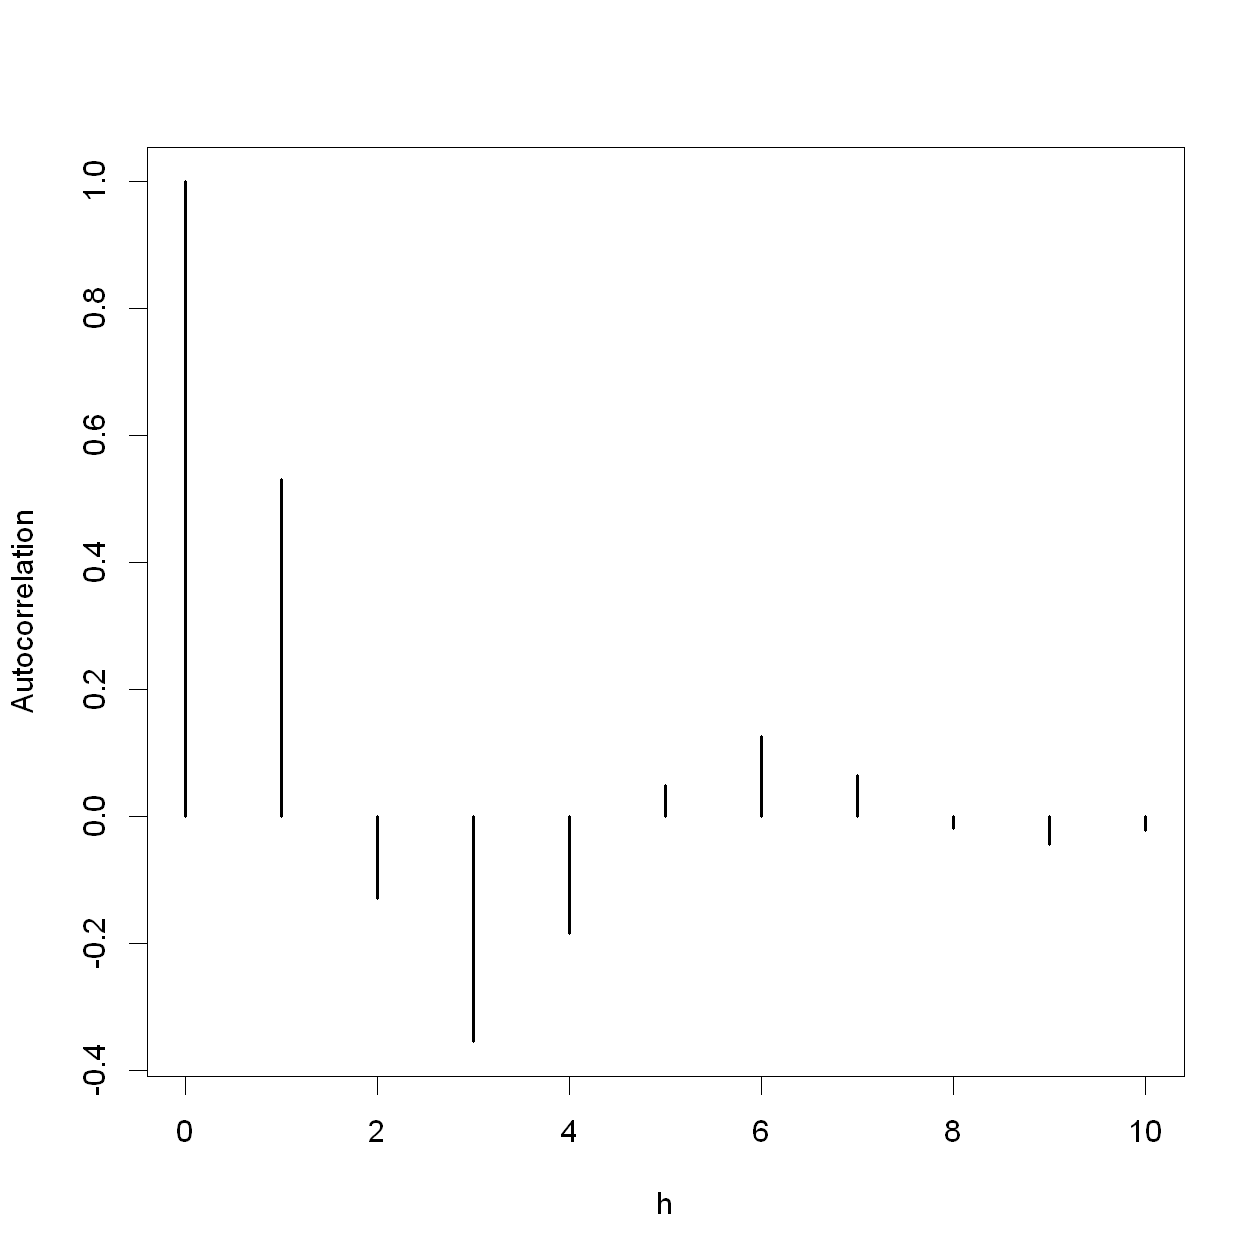

In [11]:
plot(0:10, model.acf, xlab="h", ylab="Autocorrelation", type="h", lwd=2)

### Part d

In [12]:
n = 1000
burn = 1000
n.total <- n + burn
phi <- c(0.7, -0.5)
theta <- 0.2
z <- rnorm(n.total, mean=0, sd=1)
x <- numeric(n.total)
x[1] = 0
x[2] = 0
for (t in 3:n.total) {
x[t] <- phi[1] * x[t-1] + phi[2] * x[t-2] + z[t] + theta * z[t-1]
}
x.burned <- x[(burn + 2):n.total]

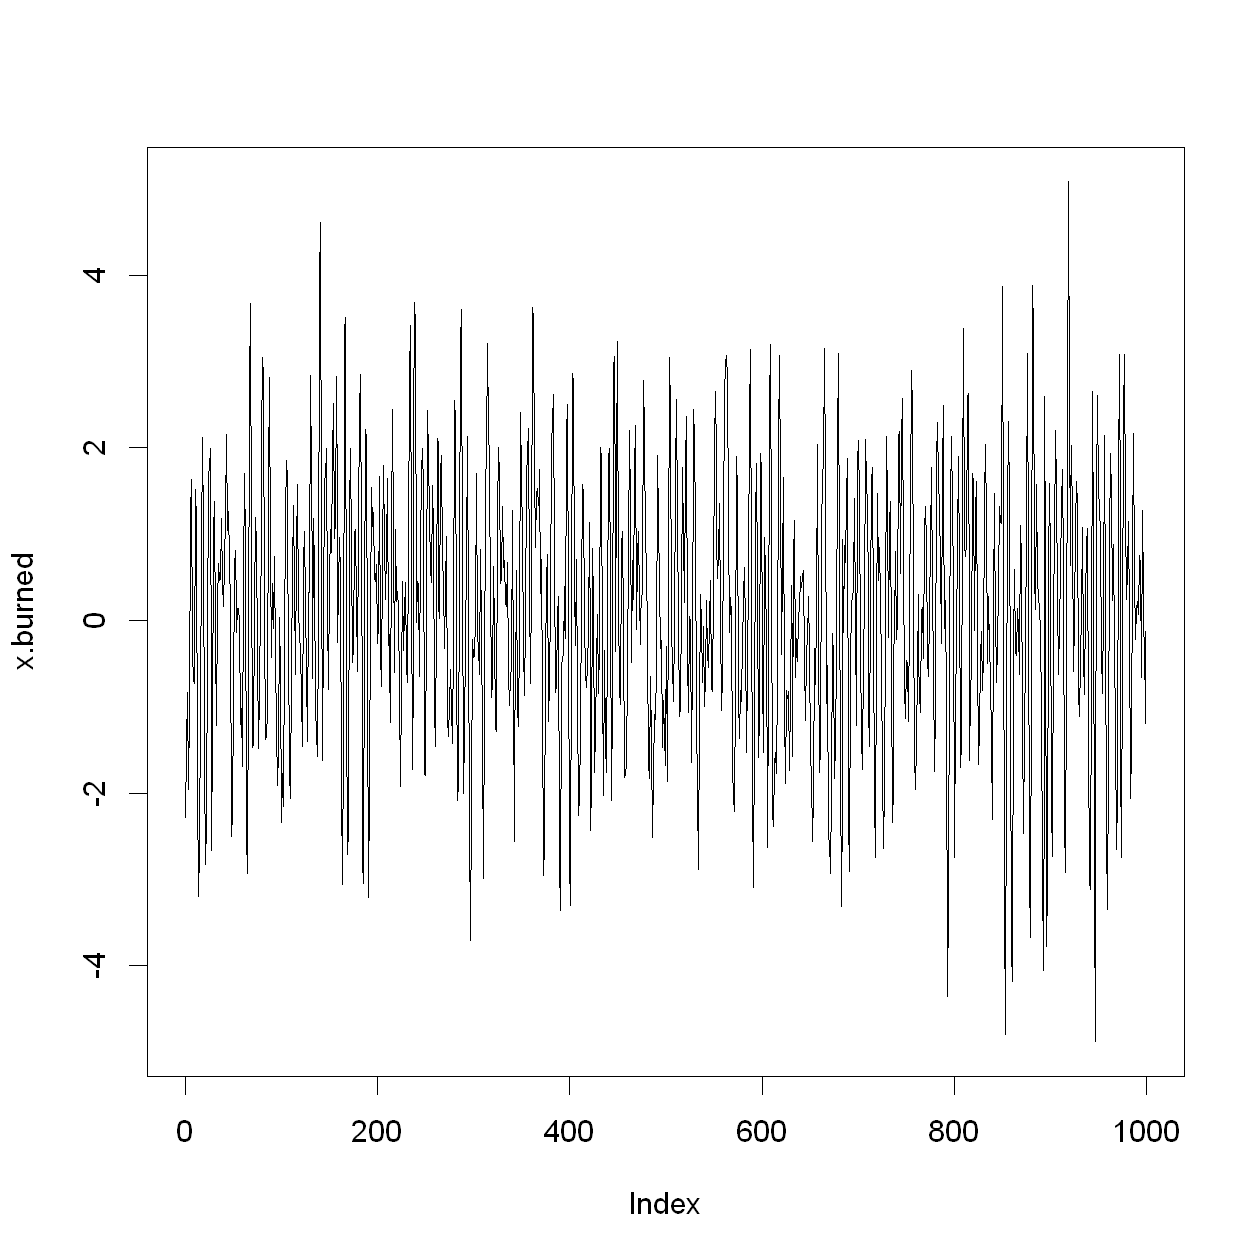

In [13]:
plot(x.burned, type='l')

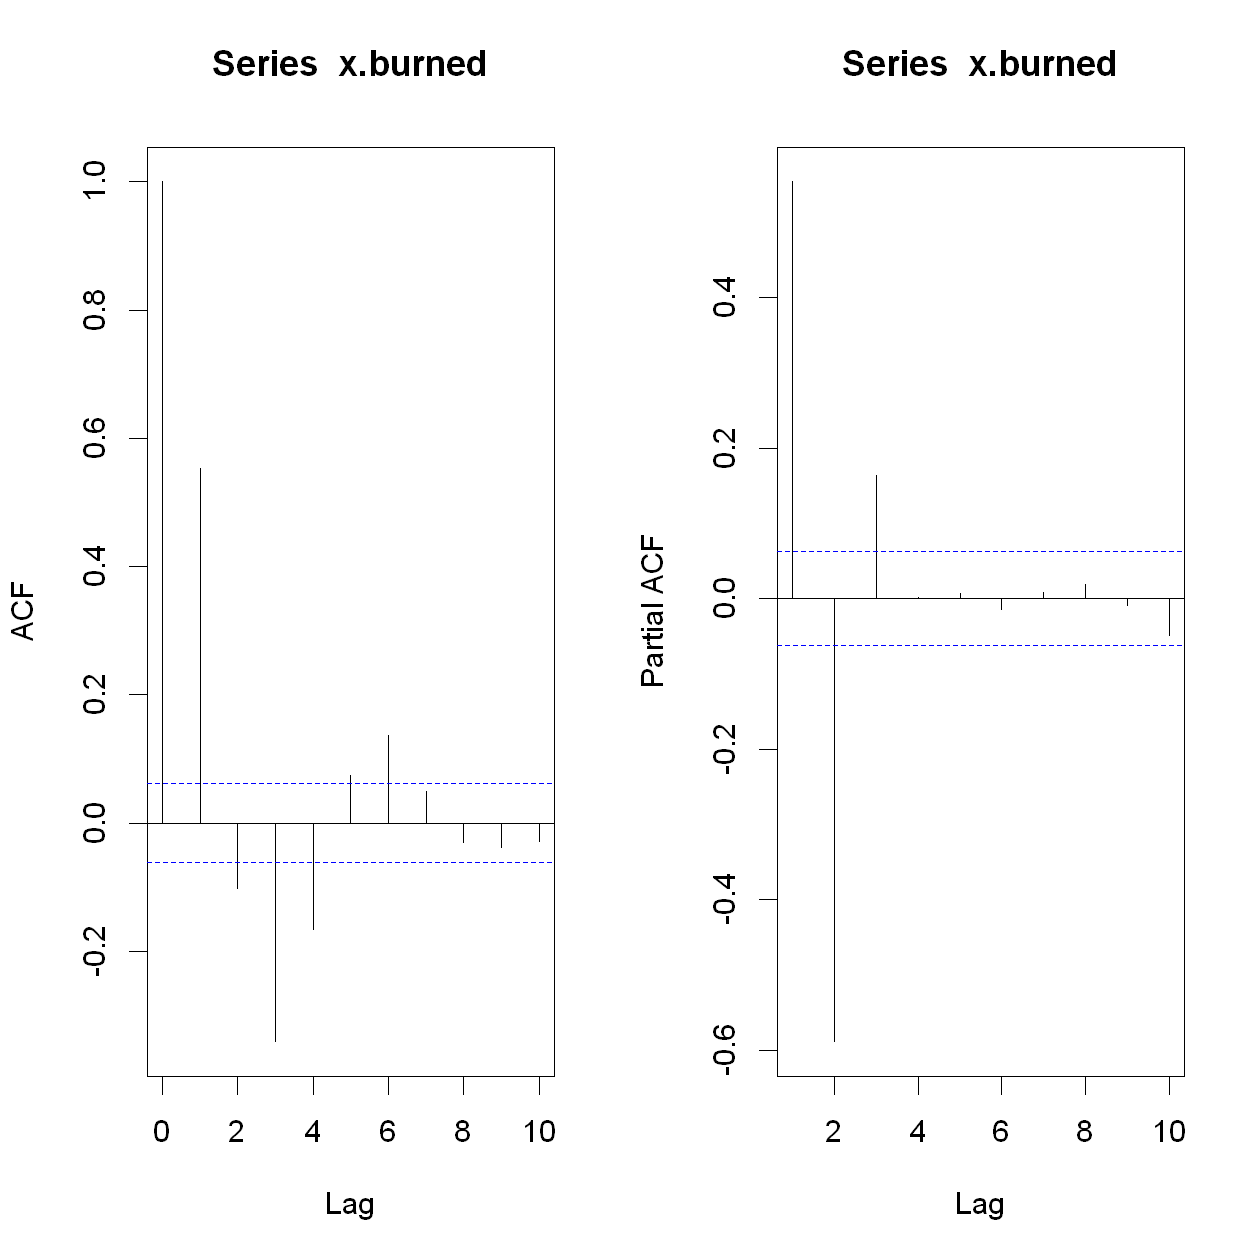

In [14]:
par(mfrow=c(1, 2))

acf(x.burned, lag.max=10, type='correlation', plot=TRUE)

acf(x.burned, lag.max=10, type='partial', plot=TRUE)

## Problem 2

In [15]:
library(quantmod)
gnp <- getSymbols("GNP", auto.assign=FALSE, src="FRED")["::2022-7"]
gnp.log <- log(gnp)

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR



### Part a

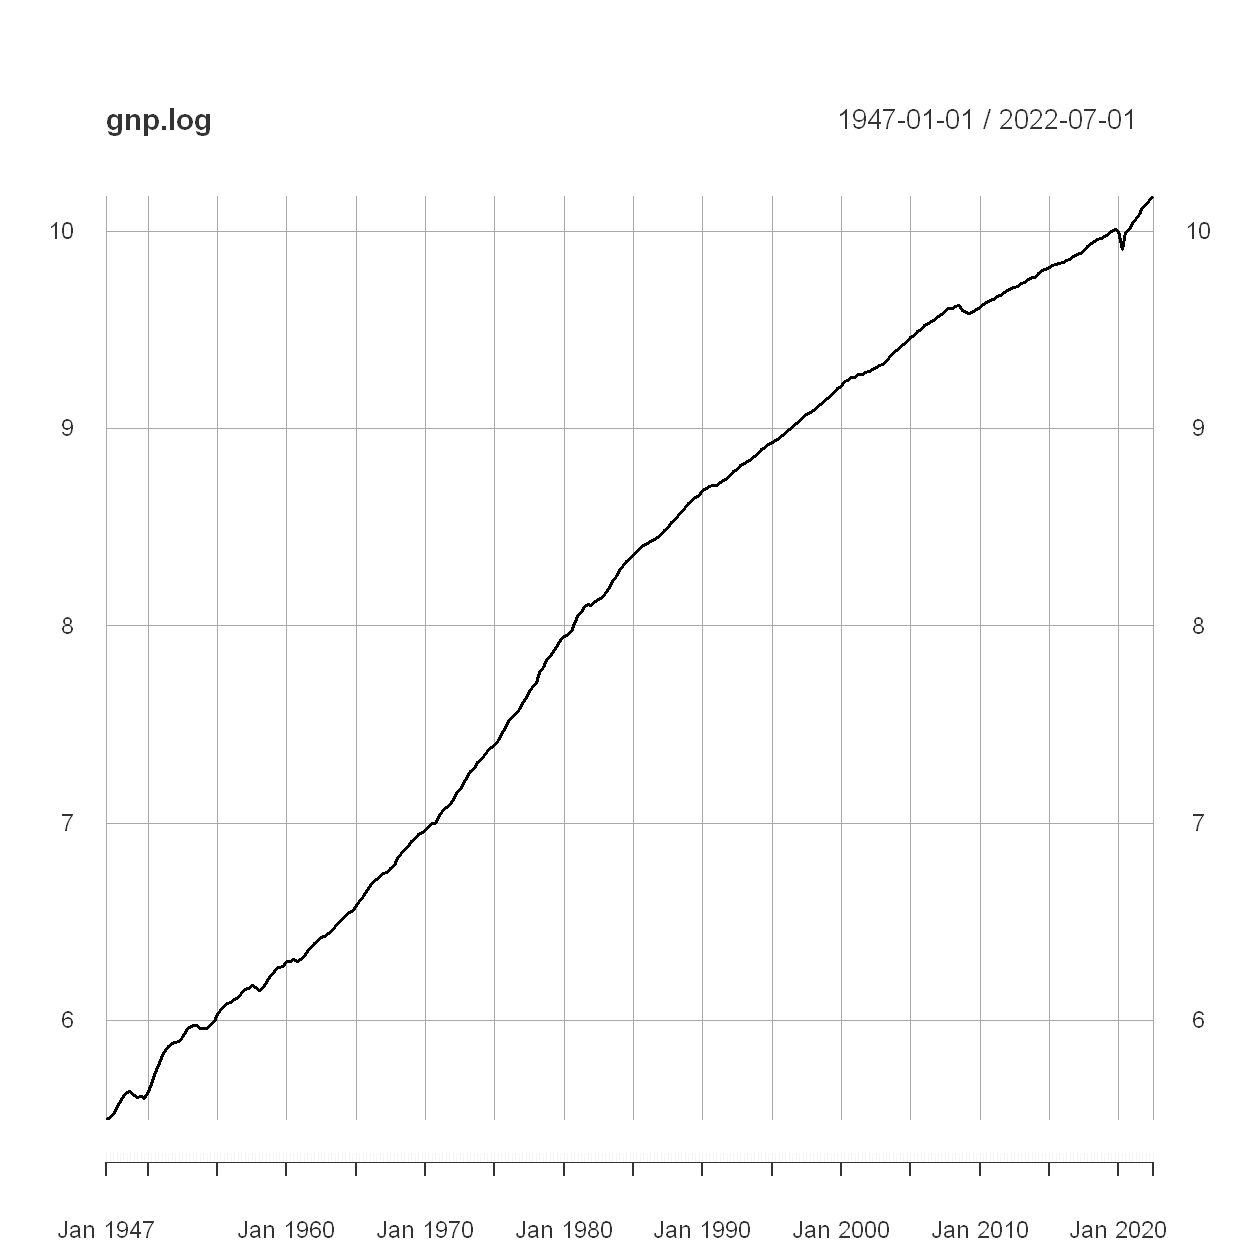

In [16]:
plot(gnp.log)

For a weakly stationary time series we're expecting a constant mean and autocovariance, neither of which depend on T. The log of GNP is clearly constantly increasing and therfore the expected value is going to depend on T.

### Part b

In [17]:
gnp.log.diff <- diff(gnp.log)[-1]

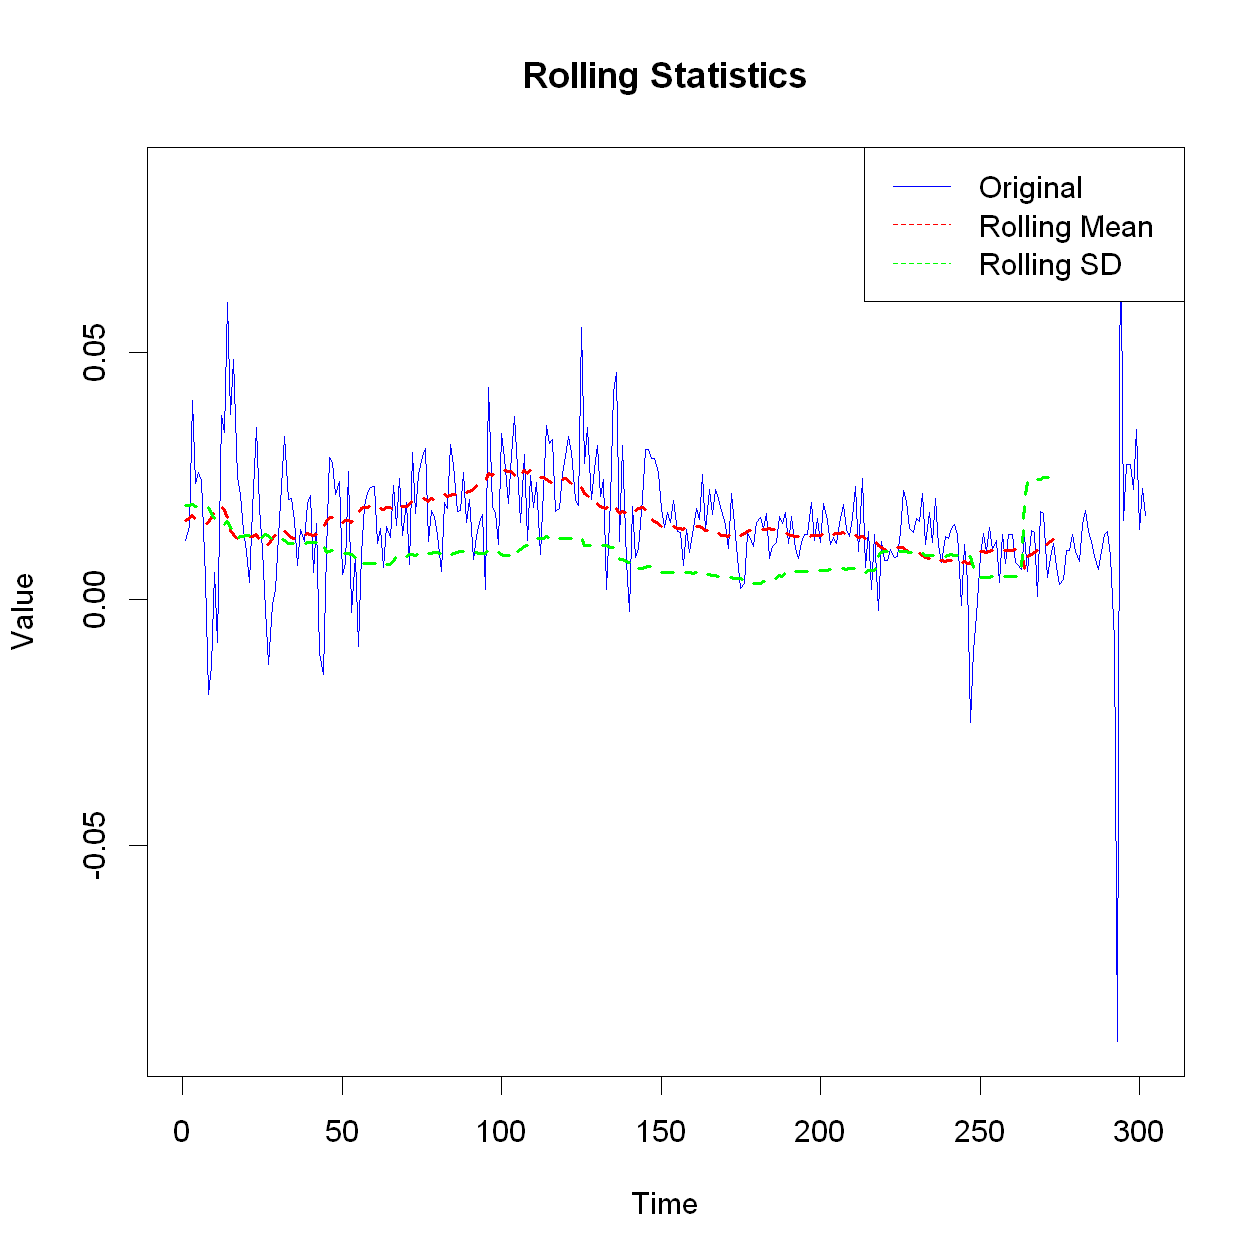

In [18]:
# Calculate rolling mean and rolling standard deviation
gnp.log.vec <- as.vector(gnp.log.diff)
rolling_mean <- rollmean(gnp.log.vec, k = 30, align = "left", fill = NA)
rolling_sd <- rollapply(gnp.log.vec, width = 30, FUN = sd, align = "left", fill = NA)

# Plot original time series
plot(gnp.log.vec, type = "l", col = "blue", main = "Rolling Statistics", xlab = "Time", ylab = "Value")

# Add lines for rolling mean and rolling standard deviation to the same plot
lines(rolling_mean, col = "red", lty = 2, lwd = 2)
lines(rolling_sd, col = "green", lty = 2, lwd = 2)

# Add legend
legend("topright", legend = c("Original", "Rolling Mean", "Rolling SD"), col = c("blue", "red", "green"), lty = c(1, 2, 2))

The expected value of the return of GNP looks constant; the rolling variance is also constant-ish. This points to the time series being stationary. There's a spike towards the end of the time period, but that's around 2020 so could be attributed to an outlier due to COVID.

### Part c

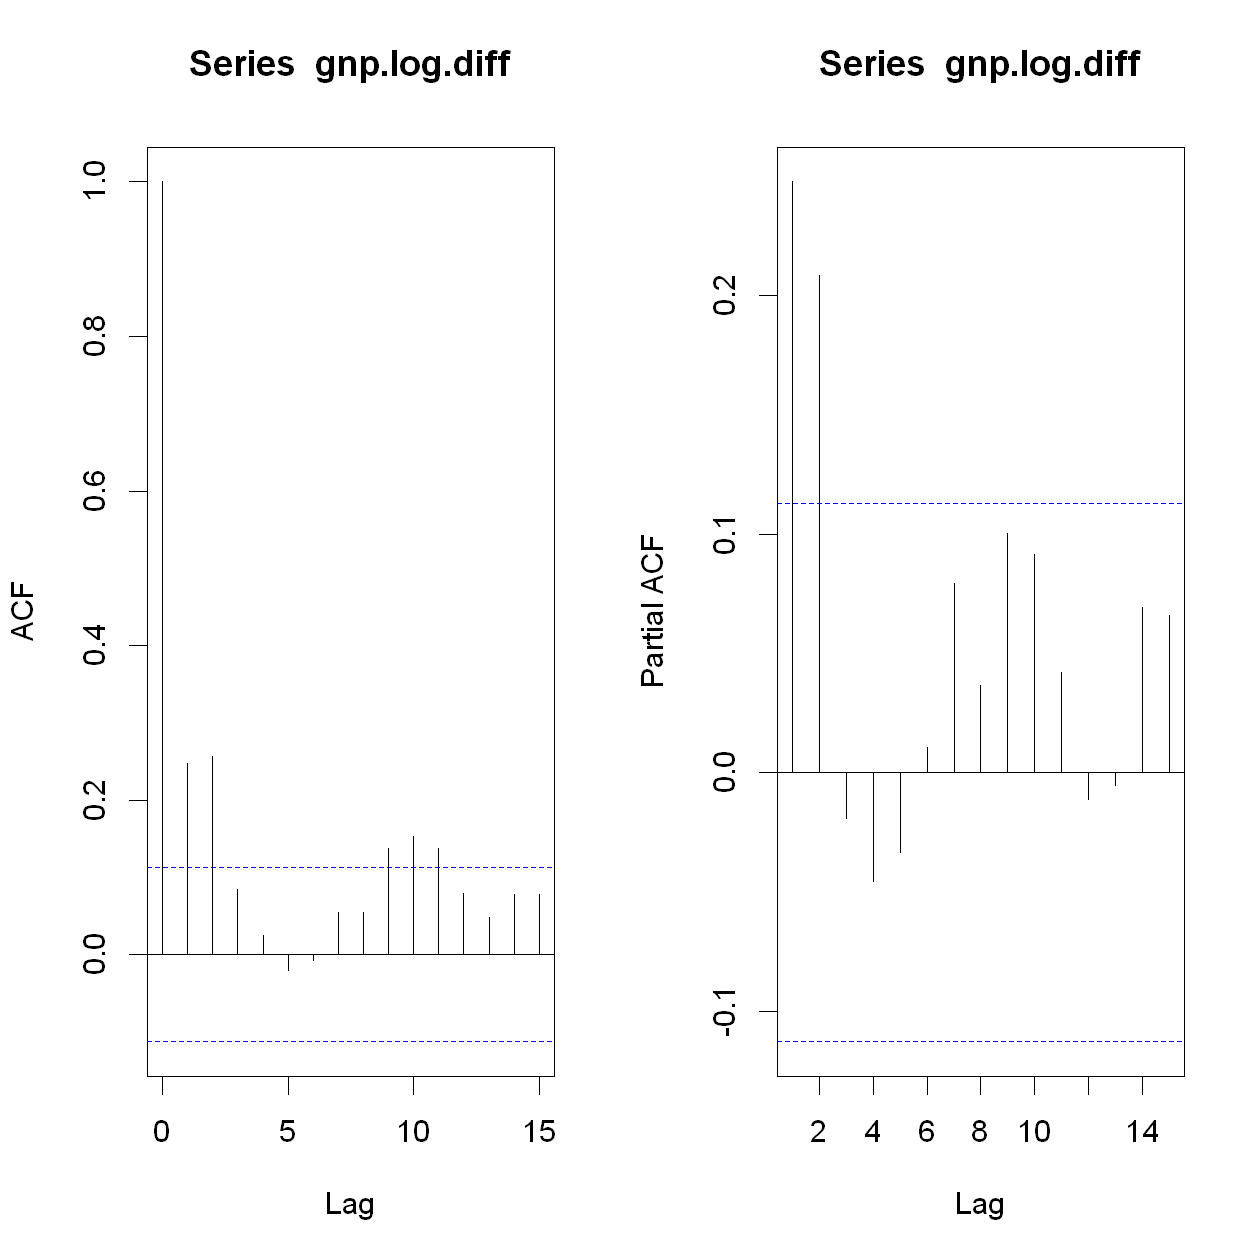

In [19]:
par(mfrow=c(1,2))

acf(gnp.log.diff, lag.max=15, type="correlation", plot=TRUE)

acf(gnp.log.diff, lag.max=15, type="partial", plot=TRUE)

* If we assume X(t) is an MA(q) process, the best choice of q would be 2. Based on the autocorrelation plot, the first 2 lags are significantly different from zero.
* If we assume X(t) is an AR(p) process, the best choice of p would be 1 based on the plots; the first lag is significantly different from zero and others are not.
* It's worth noting that there appears to be some sort of cyclicaity component in the time series, as after the first 8 or so lags the significance of subsequant lags increases. In the autocorrelation function these lags actual breach the 5% significance interval and they are close to breaching in the partial autocorrelation plot.

### Part d

#### AR(2)

In [20]:
Arima(gnp.log.diff, order=c(2, 0, 0), include.mean=FALSE)

Series: gnp.log.diff 
ARIMA(2,0,0) with zero mean 

Coefficients:
         ar1     ar2
      0.4026  0.4125
s.e.  0.0521  0.0523

sigma^2 = 0.0001811:  log likelihood = 873.09
AIC=-1740.17   AICc=-1740.09   BIC=-1729.04

In [21]:
Arima(gnp.log.diff, order=c(2, 0, 0), include.mean=TRUE)

Series: gnp.log.diff 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1     ar2    mean
      0.1953  0.2072  0.0155
s.e.  0.0561  0.0561  0.0012

sigma^2 = 0.0001549:  log likelihood = 897.59
AIC=-1787.18   AICc=-1787.05   BIC=-1772.34

#### MA(2)

In [22]:
Arima(gnp.log.diff, order=c(0, 0, 2), include.mean=FALSE)

Series: gnp.log.diff 
ARIMA(0,0,2) with zero mean 

Coefficients:
         ma1     ma2
      0.4423  0.4034
s.e.  0.0593  0.0445

sigma^2 = 0.0002426:  log likelihood = 829.21
AIC=-1652.42   AICc=-1652.34   BIC=-1641.29

In [23]:
Arima(gnp.log.diff, order=c(0, 0, 2), include.mean=TRUE)

Series: gnp.log.diff 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
         ma1     ma2    mean
      0.1798  0.2311  0.0155
s.e.  0.0569  0.0533  0.0010

sigma^2 = 0.0001559:  log likelihood = 896.61
AIC=-1785.21   AICc=-1785.08   BIC=-1770.37

#### ARMA(2, 2)

In [24]:
Arima(gnp.log.diff, order=c(2, 0, 2), include.mean=FALSE)

Series: gnp.log.diff 
ARIMA(2,0,2) with zero mean 

Coefficients:
         ar1      ar2      ma1     ma2
      1.5033  -0.5038  -1.2883  0.3133
s.e.  0.1533   0.1531   0.1590  0.1500

sigma^2 = 0.0001569:  log likelihood = 895
AIC=-1779.99   AICc=-1779.79   BIC=-1761.44

In [25]:
Arima(gnp.log.diff, order=c(2, 0, 2), include.mean=TRUE)

Series: gnp.log.diff 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1     ma2    mean
      0.6014  -0.1903  -0.4032  0.3237  0.0155
s.e.  0.5576   0.3847   0.5461  0.2522  0.0011

sigma^2 = 0.0001554:  log likelihood = 898.15
AIC=-1784.3   AICc=-1784.02   BIC=-1762.04

The AR(2) model that includes the mean produces the lowest AICc. Overall, for each set of models, the version that includes the mean produces the lower AICc, which makes sense because the mean of the time series is non-zero.

### Part e

$$
    Z \sim N(0, 0.0001549)
$$
$$
    X_t - 0.1953 X_{t-1} - 0.2072 X_{t-2} + 0.0155 = Z_t
$$

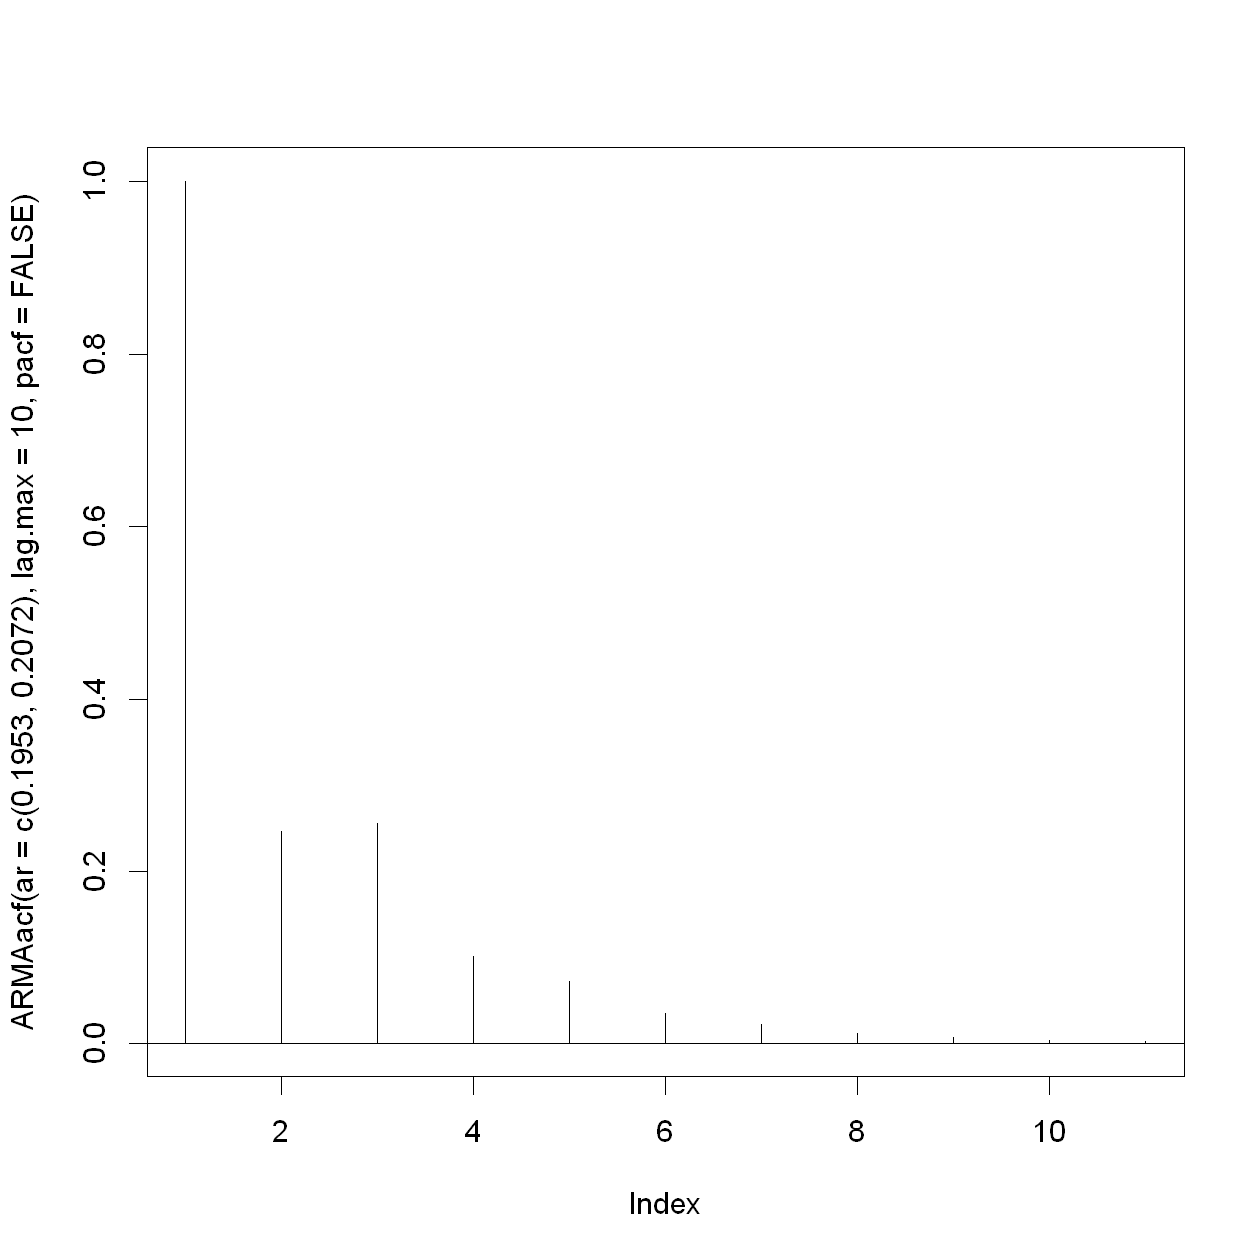

In [26]:
plot(ARMAacf(ar=c(0.1953, 0.2072), lag.max=10, pacf=FALSE), type='h')
abline(h=0)

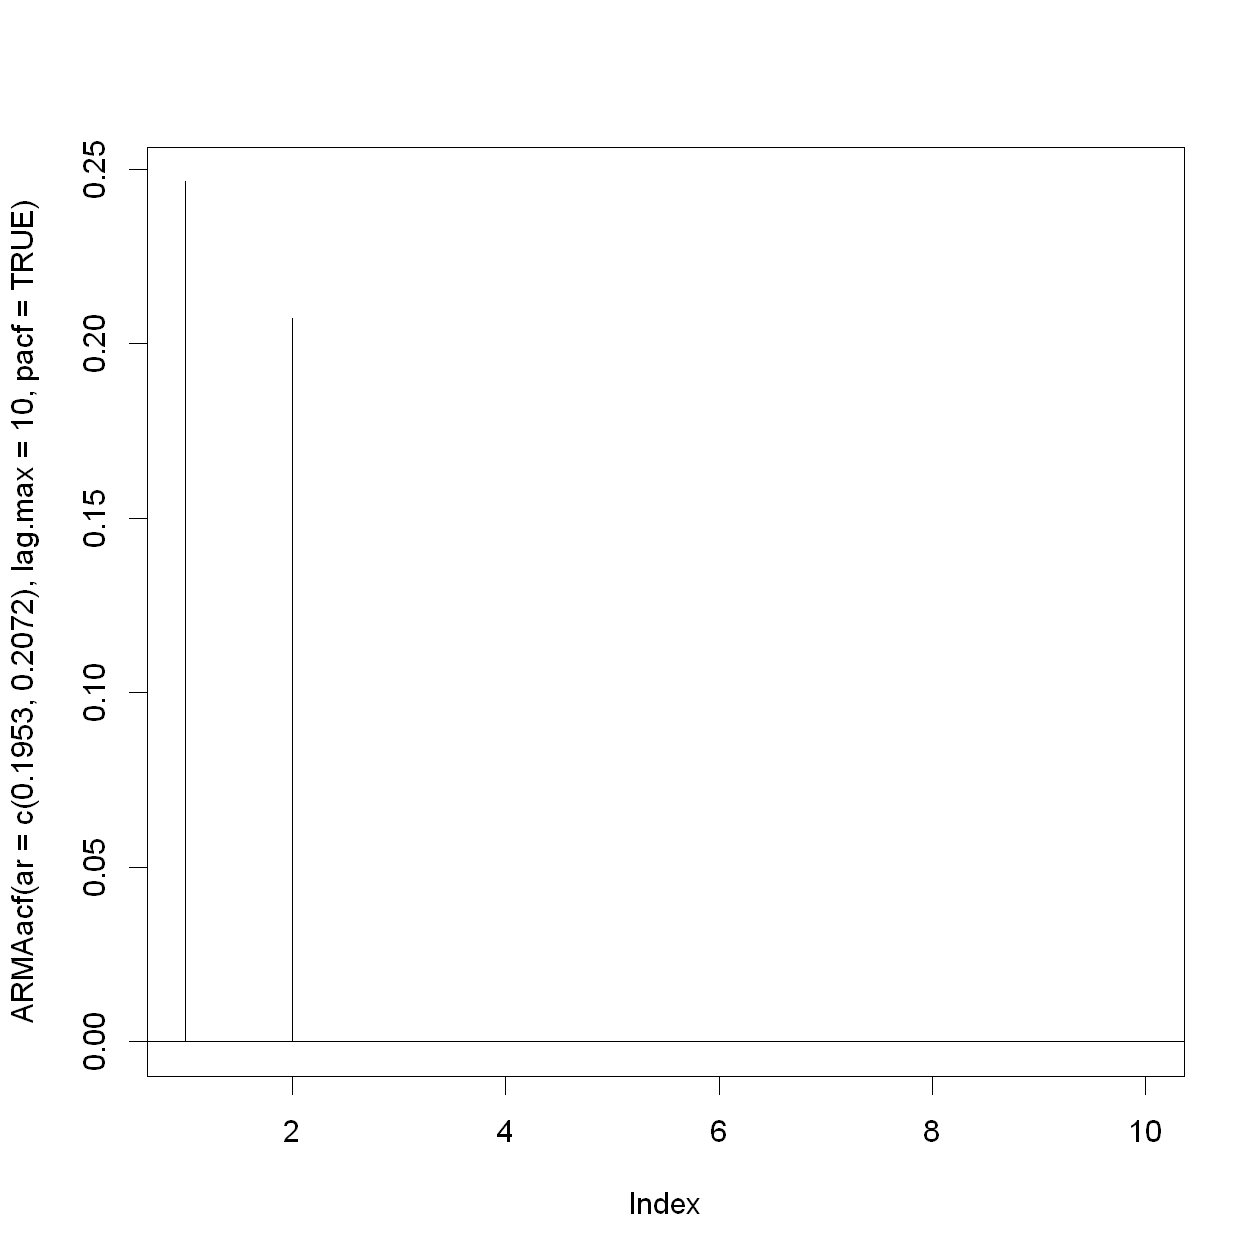

In [27]:
plot(ARMAacf(ar=c(0.1953, 0.2072), lag.max=10, pacf=TRUE), type='h')
abline(h=0)

### Part f

In [28]:
Arima(gnp.log, order=c(2, 1, 2), include.mean=TRUE, include.drift=TRUE)

Series: gnp.log 
ARIMA(2,1,2) with drift 

Coefficients:
         ar1      ar2      ma1     ma2   drift
      0.6014  -0.1903  -0.4032  0.3237  0.0155
s.e.  0.5575   0.3847   0.5461  0.2522  0.0011

sigma^2 = 0.0001555:  log likelihood = 898.15
AIC=-1784.3   AICc=-1784.02   BIC=-1762.04

In [29]:
Arima(gnp.log.diff, order=c(2, 0, 2), include.mean=TRUE)

Series: gnp.log.diff 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1     ma2    mean
      0.6014  -0.1903  -0.4032  0.3237  0.0155
s.e.  0.5576   0.3847   0.5461  0.2522  0.0011

sigma^2 = 0.0001554:  log likelihood = 898.15
AIC=-1784.3   AICc=-1784.02   BIC=-1762.04

## Problem 3

In [30]:
load("homework8_data.Rdata")

### Part a

In [31]:
fit = lm(formula=y~x)

In [32]:
summary(fit)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3472 -0.4209  0.0094  0.3783  1.9245 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04563    0.04256   1.072    0.285    
x            0.99887    0.07121  14.028   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6012 on 198 degrees of freedom
Multiple R-squared:  0.4985,	Adjusted R-squared:  0.4959 
F-statistic: 196.8 on 1 and 198 DF,  p-value: < 2.2e-16


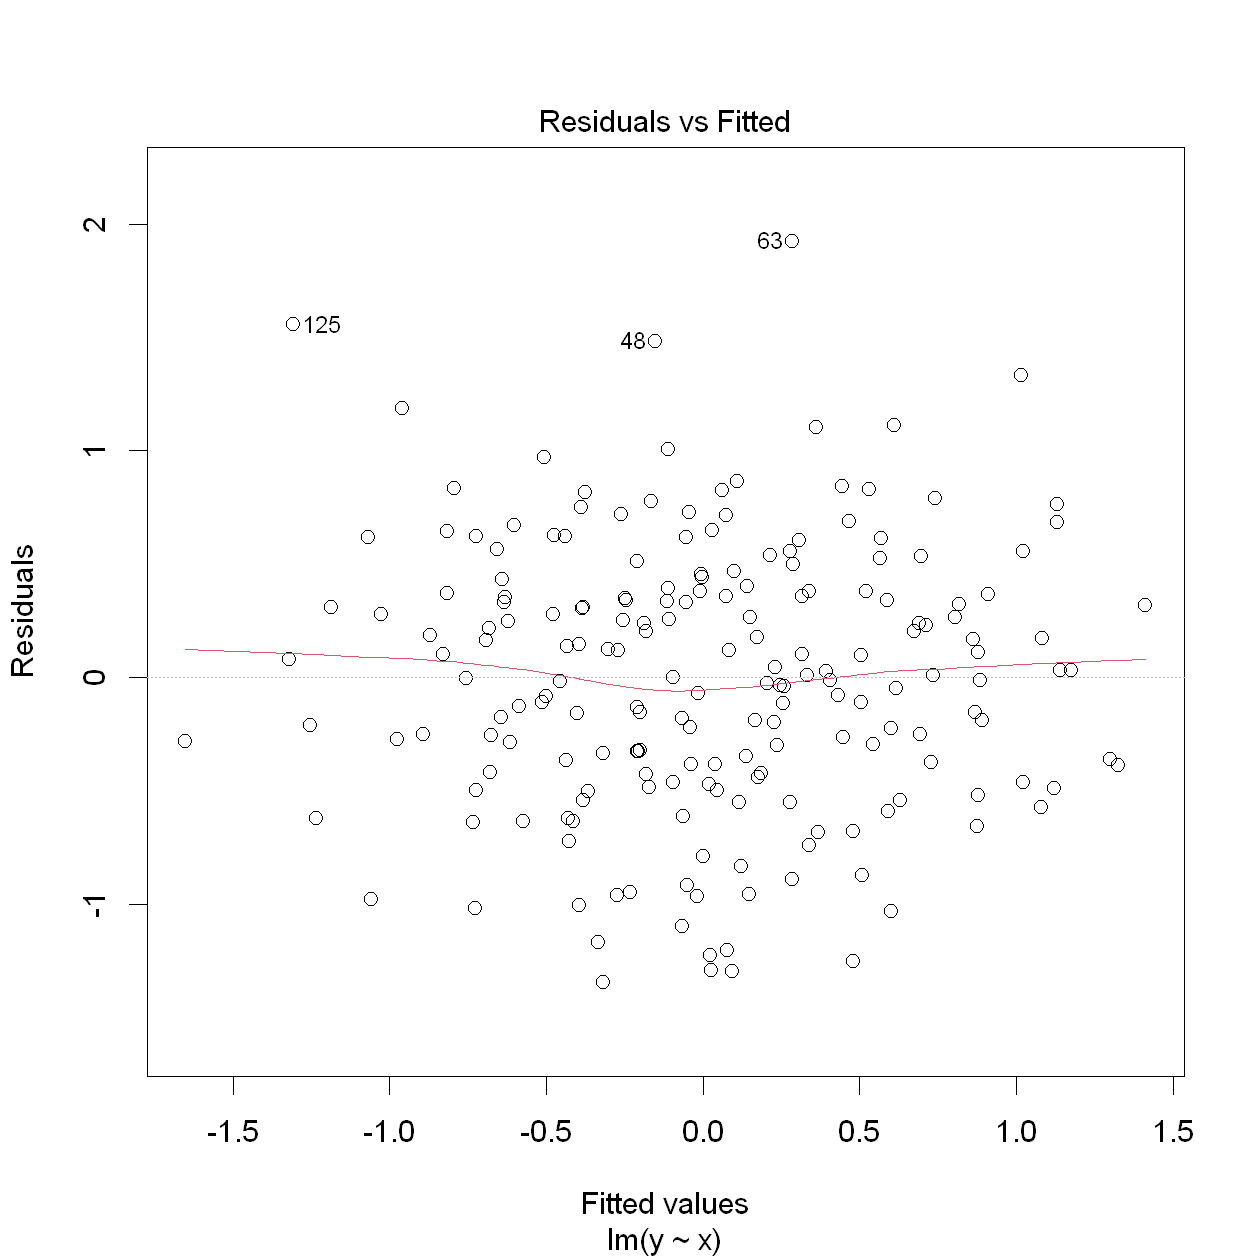

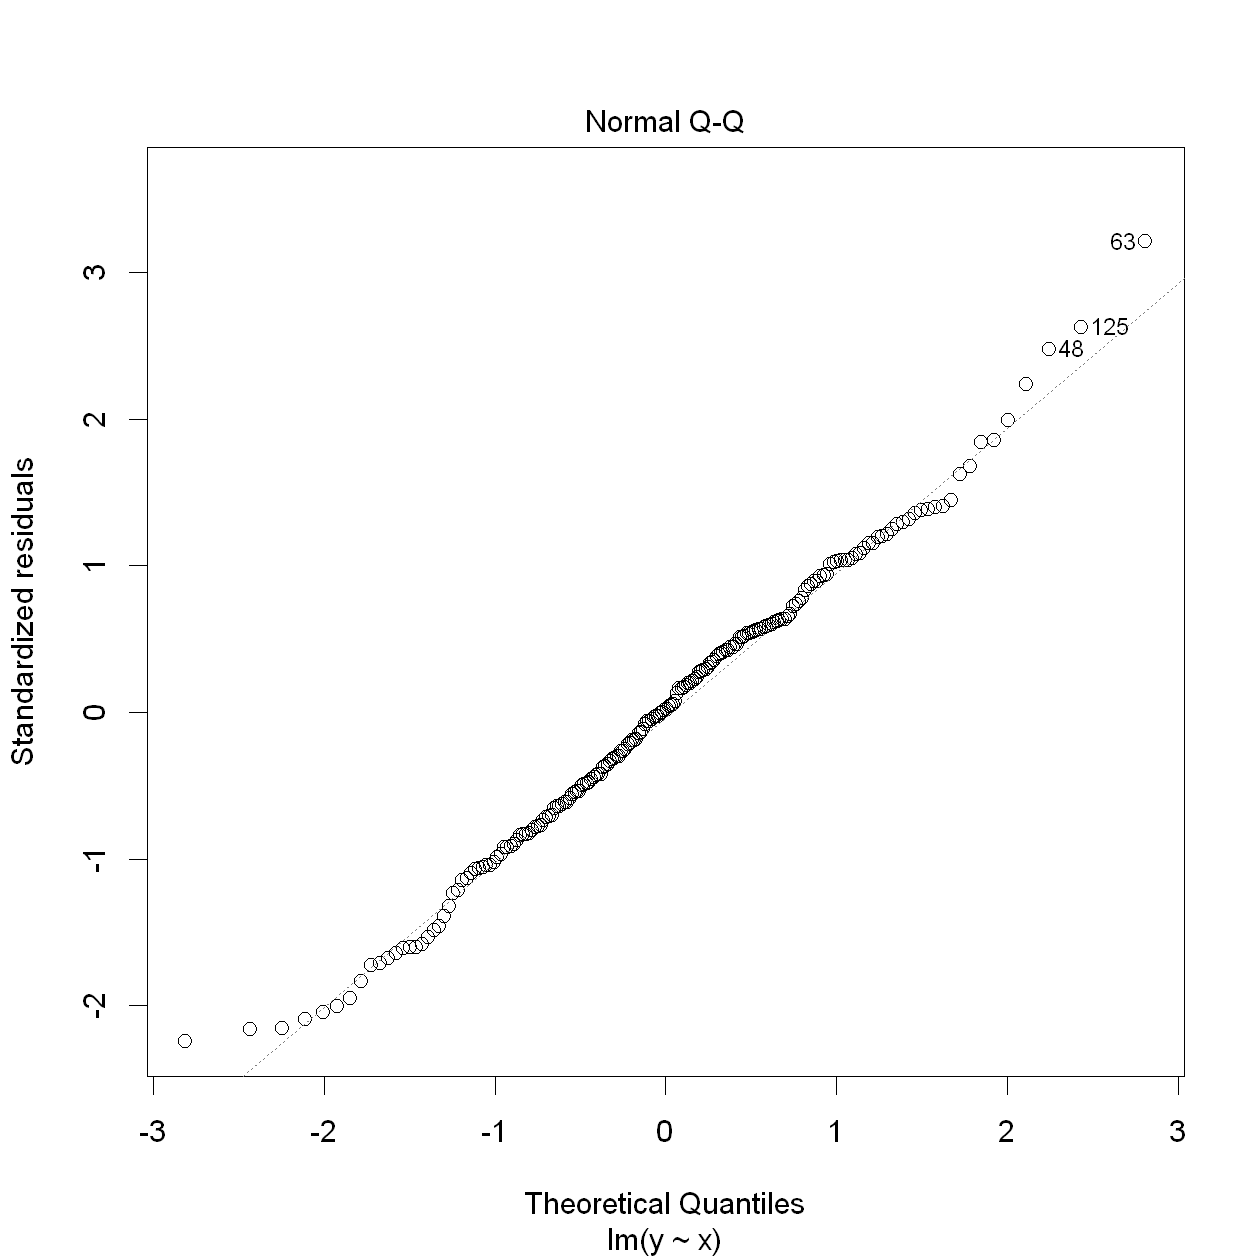

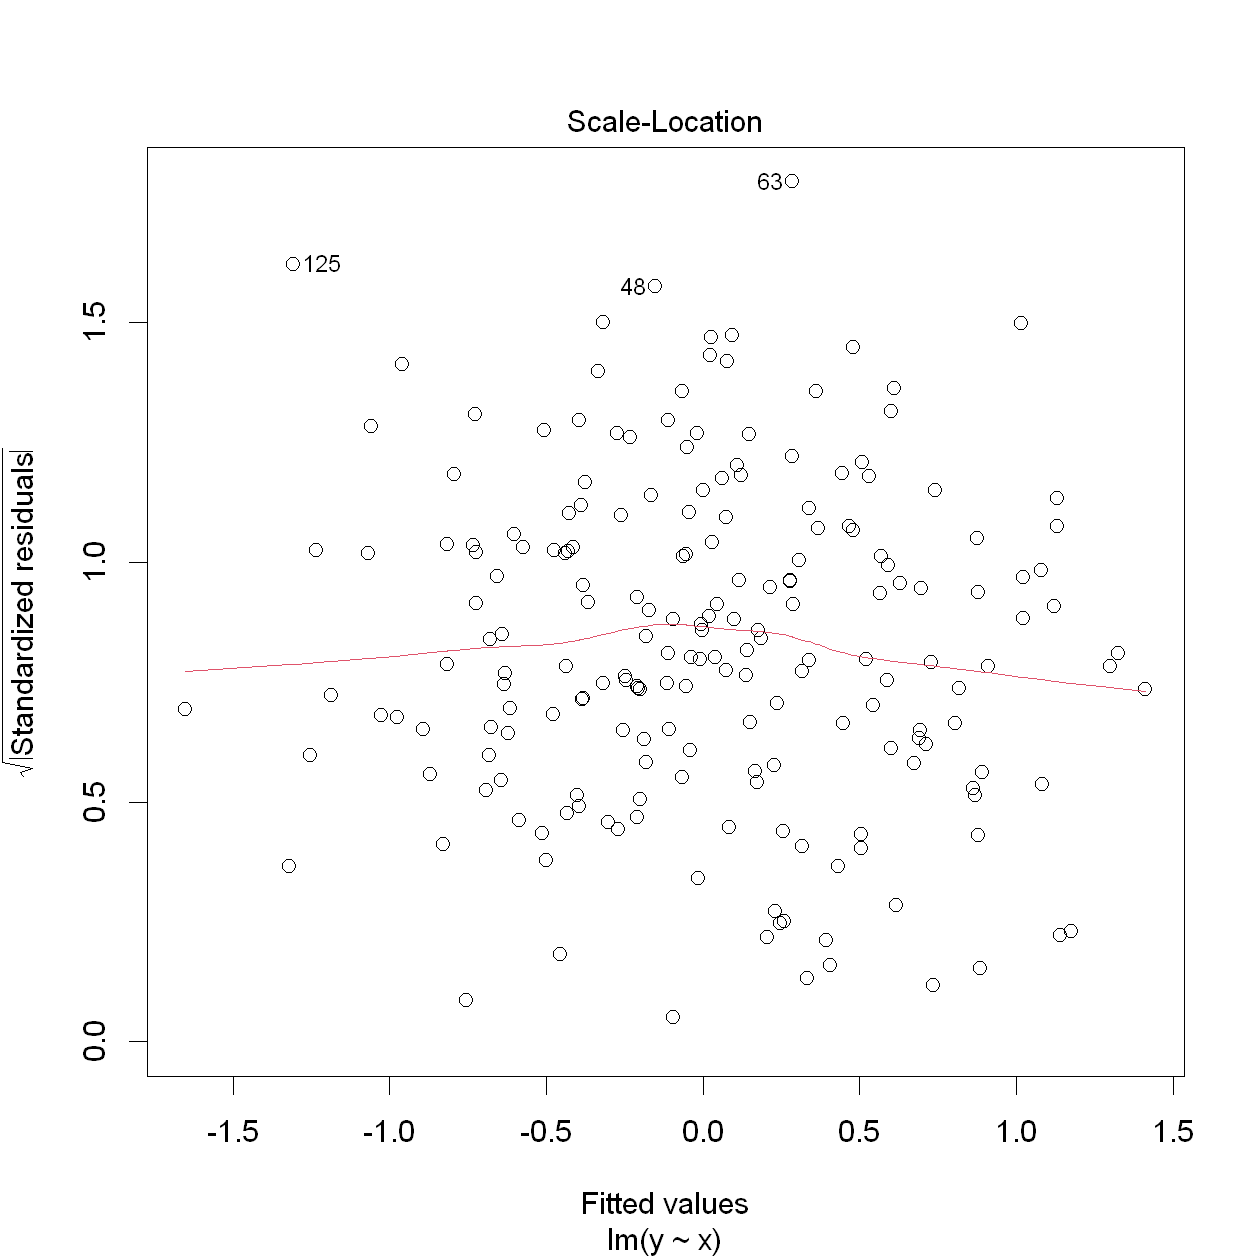

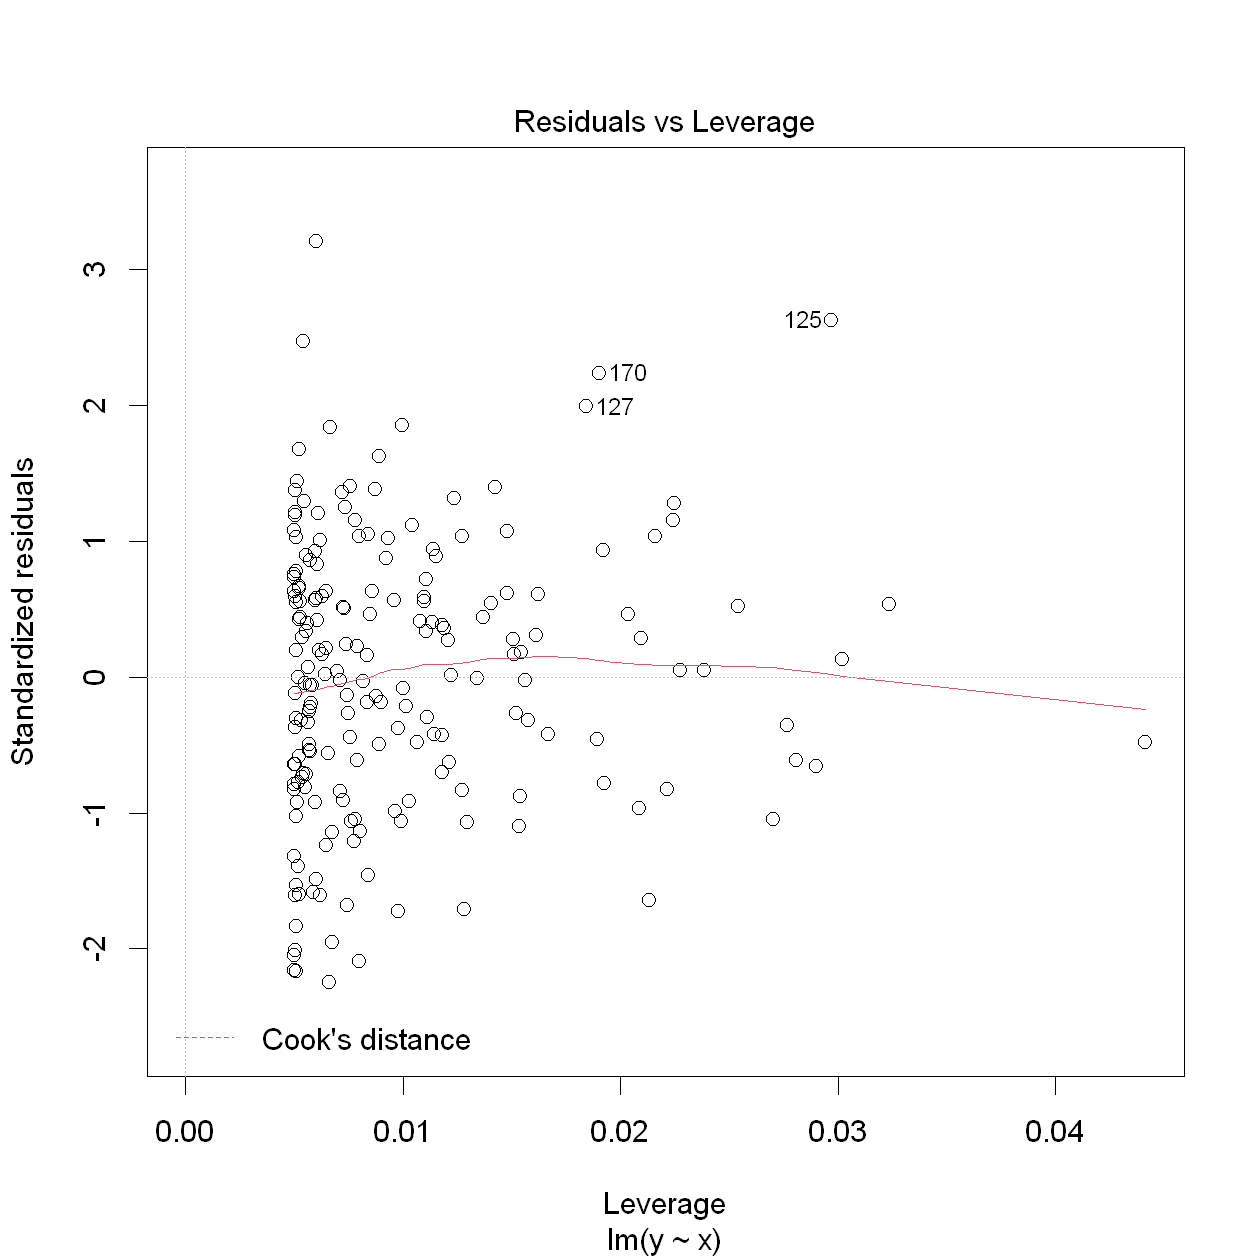

In [33]:
plot(fit)

This regression looks valid. The residuals have a constant mean and variance, and they appear normally distributed based on the QQ plot.

### Part b

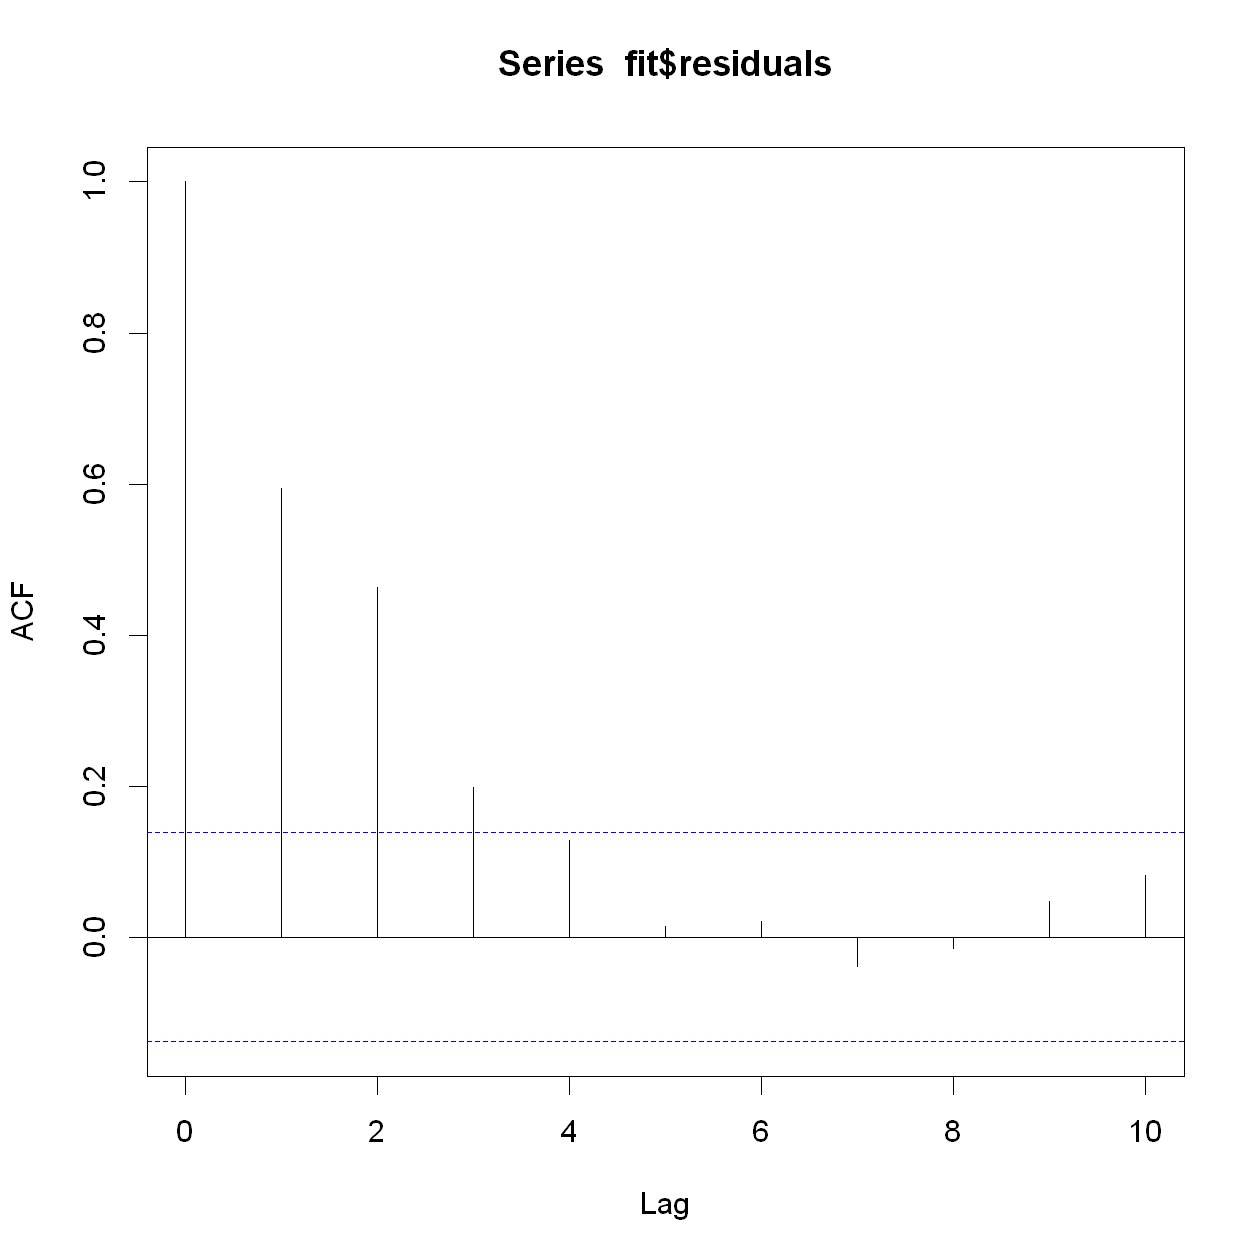

In [34]:
acf(fit$residuals, lag.max=10, type='correlation')

If the residuals were white noise, then the autocorrelation at all lags > 0 would be zero. That is not the case, lags 1-3 have autocorrelation statistically different from zero.

### Part c

In [35]:
auto.arima(fit$residuals, stepwise=FALSE)

Series: fit$residuals 
ARIMA(3,0,0) with zero mean 

Coefficients:
         ar1     ar2      ar3
      0.5371  0.2827  -0.2238
s.e.  0.0691  0.0762   0.0700

sigma^2 = 0.215:  log likelihood = -128.92
AIC=265.83   AICc=266.04   BIC=279.03

In [36]:
order.max <- 4
aicc.matrix <- matrix(NA, nrow=order.max + 1, ncol=order.max+1)
for (p in 0:order.max) {
    for (q in 0:order.max) {
    aicc.matrix[p + 1, q + 1] <- Arima(fit$residuals, order=c(p, 0, q), include.mean=FALSE)$aicc
    }
}
aicc.matrix - min(aicc.matrix)

[,1]      [,2]      [,3]     [,4]     [,5]    
[1,] 99.718741 51.383529 9.302504 5.790854 4.385244
[2,] 13.506182 12.116154 3.261716 5.104557 5.018224
[3,]  9.569611  3.688252 4.206910 5.284800 6.675484
[4,]  1.701454  3.463217 5.436423 7.424105 9.554382
[5,]  3.545919  5.284951 7.467609 5.681597 0.000000

The residuals apprear to be best modeled by ARMA(3, 0). ARMA(5,5) produces an AICc lower by 1.7 but (3, 0) is of much lower order.

### Part d

I am setting include.mean=FALSE and include.drift=FALSE in the below Arima call because we are modeling the residuals; these have zero and constant mean.

In [37]:
Arima(y, order=c(3, 0, 0), include.mean=FALSE, include.drift=FALSE, xreg=x)

Series: y 
Regression with ARIMA(3,0,0) errors 

Coefficients:
         ar1     ar2      ar3    xreg
      0.5403  0.2827  -0.2249  1.0209
s.e.  0.0691  0.0763   0.0701  0.0466

sigma^2 = 0.2161:  log likelihood = -128.92
AIC=267.84   AICc=268.15   BIC=284.33

In [38]:
auto.arima(y, xreg=x, stepwise=FALSE)

Series: y 
Regression with ARIMA(3,0,0) errors 

Coefficients:
         ar1     ar2      ar3    xreg
      0.5403  0.2827  -0.2249  1.0209
s.e.  0.0691  0.0763   0.0701  0.0466

sigma^2 = 0.2161:  log likelihood = -128.92
AIC=267.84   AICc=268.15   BIC=284.33